## EA 5 Objective 5
## Sentiment Analysis on social_no info 

### Downloading tweets on FIFA 20 for sentiment analysis 




### Importing necessary libraries

In [1]:
from __future__ import print_function
import json 
import re
import os
import time
import tweepy  # pip install tweepy
import gmplot
import stem
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score 

from pandas.io.json import json_normalize
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from geopy.geocoders import Nominatim
from os import path
from PIL import Image
from stem  import stem
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.corpus import stopwords
from IPython.core.display import display, HTML
from IPython.display import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(suppress=True)


## Let´s start gathering Tweets directly from Twitter

### Twitter credentials

In [2]:
# Twitter creds
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_SECRET = ''

### Twitter Connection Object
#### This object uses Tweepy to search for tweets matching an input search term.

In [3]:
class Twitter(object):
    def __init__(self):
        auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
        self.api = tweepy.API(auth,wait_on_rate_limit=True)

    def search_tweets(self, user=None, query=None, lang=None, n=20):
        if user:  # search by user name
            api = self.api.user_timeline
        elif query:  # search by a query term
            api = self.api.search
        else:
            print('Invalid! enter user name or query term to search for')
            return None
        return tweepy.Cursor(api, screen_name=user, q=query, lang=lang).items(n)

### Creating twitter connection

In [4]:
#create twitter connection
t = Twitter()

### Create an empty list that will contain our tweet in json format

In [5]:
#collect results, adding json files to data list.
lista_tweets = []

### Start gathering tweets via TweetAPI

In [9]:
for language in ('en','fr','ar','es','pt','nl','ru','de','zh'):
    #enter search language
    for search_for in ('FIFA20 -filter:retweets', 'FIFA 20 -filter:retweets'):
        #specify the number of tweets to get
        n_tweets = 2000
        #perform our search
        tweets = t.search_tweets(query=search_for, lang=language, n=n_tweets)
        #iterate through tweet objects...
        for tweet in tweets:
            #try to get json format of tweet...
            try:
                lista_tweets.append(tweet._json)
            #skip if problem (e.g., api limit exceeded)
            except:
                pass


### Create Location GoogleMAPS fingerprint

In [ ]:

geolocator = Nominatim()

# Go through all tweets and add locations to 'coordinates' dictionary
coordinates = {'latitude': [], 'longitude': []}
for count, user_loc in enumerate(df['coordinates']):
    try:
        location = geolocator.geocode(user_loc)
        
        # If coordinates are found for location
        if location:
            coordinates['latitude'].append(location.latitude)
            coordinates['longitude'].append(location.longitude)
            
    # If too many connection requests
    except:
        pass
    
# Instantiate and center a GoogleMapPlotter object to show our map
gmap = gmplot.GoogleMapPlotter(30, 0, 3)

# Insert points on the map passing a list of latitudes and longitudes
gmap.heatmap(coordinates['latitude'], coordinates['longitude'], radius=20)

# Save the map to html file
gmap.draw("../output_data/python_heatmap.html")


#### Creating a new Pandas DataFrame with the info from Tweets, using json normalize

In [10]:
df = pd.DataFrame()
df = json_normalize(lista_tweets)

### Check for sample volume

In [11]:
df.groupby('lang').count()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.scopes.followers
lang,,,,,,,,,,,,,,,,,,,,,
ar,1908,1908,1908,1908,1908,1908,421,421,432,432,...,1,1,1,1,1,1,1,1,1,0
de,3081,3081,3081,3081,3081,3081,350,350,416,416,...,1,1,1,1,1,1,1,1,1,2
en,5500,5500,5500,5500,5500,5500,657,657,933,933,...,4,4,4,4,4,4,4,4,4,0
es,4300,4300,4300,4300,4300,4300,976,976,1117,1117,...,4,4,4,4,4,4,4,4,4,0
fr,4480,4480,4480,4480,4480,4480,615,615,734,734,...,4,4,4,4,4,4,4,4,4,0
nl,958,958,958,958,958,958,126,126,146,146,...,0,0,0,0,0,0,0,0,0,0
pt,3514,3514,3514,3514,3514,3514,457,457,528,528,...,3,3,3,3,3,3,3,3,3,0
ru,323,323,323,323,323,323,4,4,8,8,...,0,0,0,0,0,0,0,0,0,0
zh,8,8,8,8,8,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Show tweet text sample

In [12]:
df['text'].head()

0    Another piece of top class officiating, well d...
1                            How’s Laporte in #FIFA20?
2    Jack I no get the #FIFA20 yet oooo 😓 https://t...
3    Bundesliga SBC\n\n172k on the PS4\n181k on Xbo...
4    Simple FUT trading method guides here —&gt; ht...
Name: text, dtype: object

### If we need to download tweets we can export to csv

In [13]:
df.to_csv ('../output_data/DF_Tweets.csv', index = None, header=True) 

### Create data as dataframe 

In [29]:
data = df

### Check for null values 

In [30]:
data.isna().sum()

created_at                                          0
id                                                  0
id_str                                              0
text                                                0
truncated                                           0
                                                ...  
quoted_status.place.country                     24055
quoted_status.place.contained_within            24055
quoted_status.place.bounding_box.type           24055
quoted_status.place.bounding_box.coordinates    24055
quoted_status.scopes.followers                  24070
Length: 345, dtype: int64

### Dropping not necessary columns from raw tweets

In [31]:
data = data.drop(['in_reply_to_status_id'], axis=1)
data = data.drop(['in_reply_to_status_id_str'], axis=1)
data = data.drop(['in_reply_to_user_id'], axis=1)
data = data.drop(['in_reply_to_user_id_str'], axis=1)
data = data.drop(['in_reply_to_screen_name'], axis=1)
data = data.drop(['geo'], axis=1)
data = data.drop(['coordinates'], axis=1)
data = data.drop(['place'], axis=1)
data = data.drop(['contributors'], axis=1)
data = data.drop(['possibly_sensitive'], axis=1)


### Language detection 

### We select text, lang to train a count vectorier to identify the language of each Tweet

In [32]:
language_detection_data = data [['text', 'lang']]

In [33]:
#get labels ids, based on the different languages that are present in the data
Y = language_detection_data['lang'].factorize()[0]
language_detection_data['lang_id'] = Y
#X is an array of strings of text, the content of text messages
X = language_detection_data['text']

#Here we do our train/test splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=123) 
 


In [34]:
#initialize vectorizer splitting the text by characters, taking one-grams and bi-grams 
cnt = CountVectorizer(ngram_range =(1,2), analyzer='char_wb')

fts_train = cnt.fit_transform(X_train)
fts_test = cnt.transform(X_test) 

In [35]:
nb = MultinomialNB(alpha=.3)

In [36]:
nb.fit(fts_train, Y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [37]:
Y_hat = nb.predict(fts_test) 

### We can see in the performance metrics that all languages fit in prediction we nice accuracy and recall. 

In [38]:
print('Prediction Accuracy')
print(accuracy_score(Y_test, Y_hat))
print('\nClassification Report')
print(classification_report(Y_test, Y_hat)) 
Y_hat = nb.predict(fts_test) 

Prediction Accuracy
0.9345794392523364

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1112
           1       0.95      0.95      0.95       888
           2       0.99      0.99      0.99       364
           3       0.93      0.92      0.92       855
           4       0.95      0.91      0.93       720
           5       0.82      0.85      0.83       178
           6       1.00      1.00      1.00        64
           7       0.93      0.94      0.94       632
           8       0.00      0.00      0.00         2

    accuracy                           0.93      4815
   macro avg       0.83      0.83      0.83      4815
weighted avg       0.93      0.93      0.93      4815



### Let´s use Vader-Sentiment intensity functionality

In [39]:
analyzer = SentimentIntensityAnalyzer()

### We need to convert tweets into string and clean or preprocess the information


In [42]:
#we should make sure that our `text` column contains only strings

data['text'] =  data['text'].astype('str')


In [43]:
#text cleaning and pre-processing

data['text'] = data['text'].apply(lambda x: re.sub('RT.*?:', '', x)) #RT means retweet 
data['text'] = data['text'].apply(lambda x: re.sub(r"http\S+", '', x)) #no need for URLs
data['text'] = data['text'].apply(lambda x: re.sub("\n", '', x)) 
data['text'] = data['text'].apply(lambda x: re.sub(r"@\S+", '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r"#", '', x)) 
data['text'] = data['text'].apply(lambda x: re.sub(r"@", '', x)) 

### Now we apply the analyzer over the twitters, splitting into 3 levels of sentiment 

In [44]:
data['sentiment'] = data['text'].apply(lambda x: analyzer.polarity_scores(x)["compound"])

In [45]:
data['neg'] = data['text'].apply(lambda x: analyzer.polarity_scores(x)["neg"])
data['neu'] = data['text'].apply(lambda x: analyzer.polarity_scores(x)["neu"])
data['pos'] = data['text'].apply(lambda x: analyzer.polarity_scores(x)["pos"])

### Let´s see the results 

### Top5 Positive Sentiment

In [46]:
data.sort_values('pos', ascending=False).head(5)['text']

79      Thanks 
229     Thanks 
1468    Thanks 
3780    Thanks 
6774     Good. 
Name: text, dtype: object

### Top5 Negative Sentiment

In [47]:
data.sort_values('neg', ascending=False).head(5)['text']

6818                                               Wtf   
847                                                Oh no!
547                                                Oh no!
674      “you miss this dick?” no bitch I miss tumblr ...
5494                              FIFA20 lag is fucked up
Name: text, dtype: object

In [48]:
### Searching by index 

In [49]:
data.loc[data['sentiment'][::-1].idxmax()].text, data.loc[data['sentiment'][::-1].idxmax()].sentiment

(' I love the work you did with FIFA 20, and Madden 20 the best of the best. 👌🏻 best greatjob',
 0.9748)

### Let´s plot the sentiment over the data

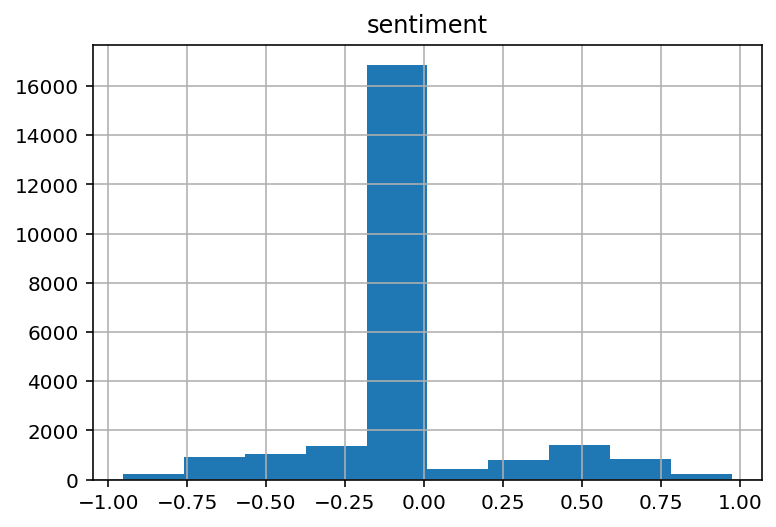

In [50]:
hst = data.hist(column='sentiment')

## WordCloud

### Give us a nive visual photo on the Tokens

In [51]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

In [52]:
stopwords=stopwords
stopwords.add("FIFA20")


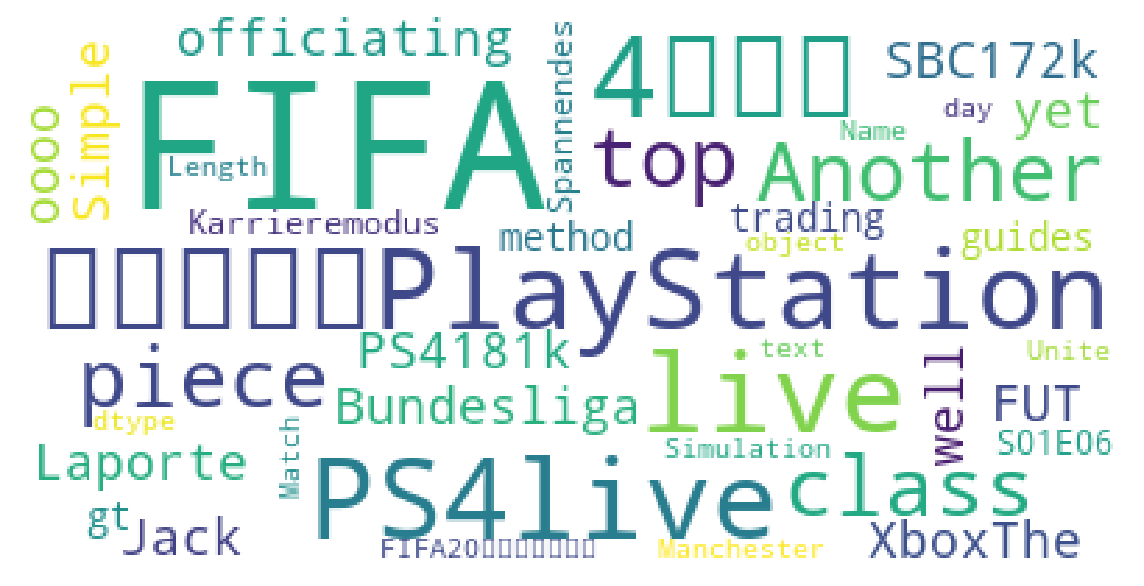

In [53]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          #max_words=300,
                          #max_font_size=40, 
                          random_state=42 
                          #mask = Tweet_mask,
                         ).generate(str(data['text']))

print(wordcloud)
fig = plt.figure(1, figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

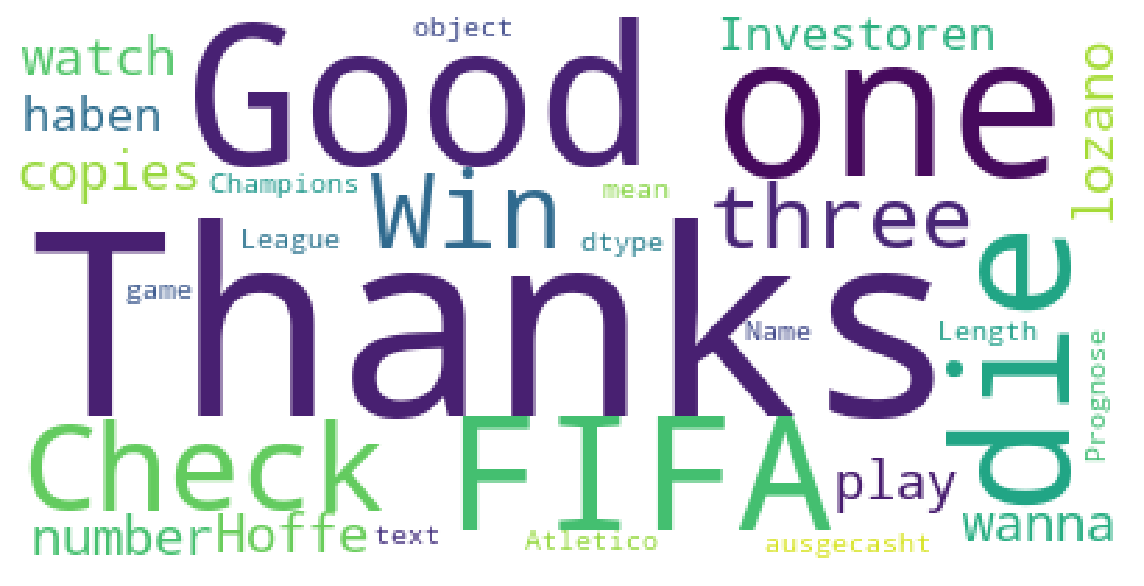

In [54]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          #max_words=300,
                          #max_font_size=40, 
                          random_state=42 
                          #mask = Tweet_mask,
                         ).generate(str(data.sort_values('pos', ascending=False).head(1500)['text']))

print(wordcloud)
fig = plt.figure(1, figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

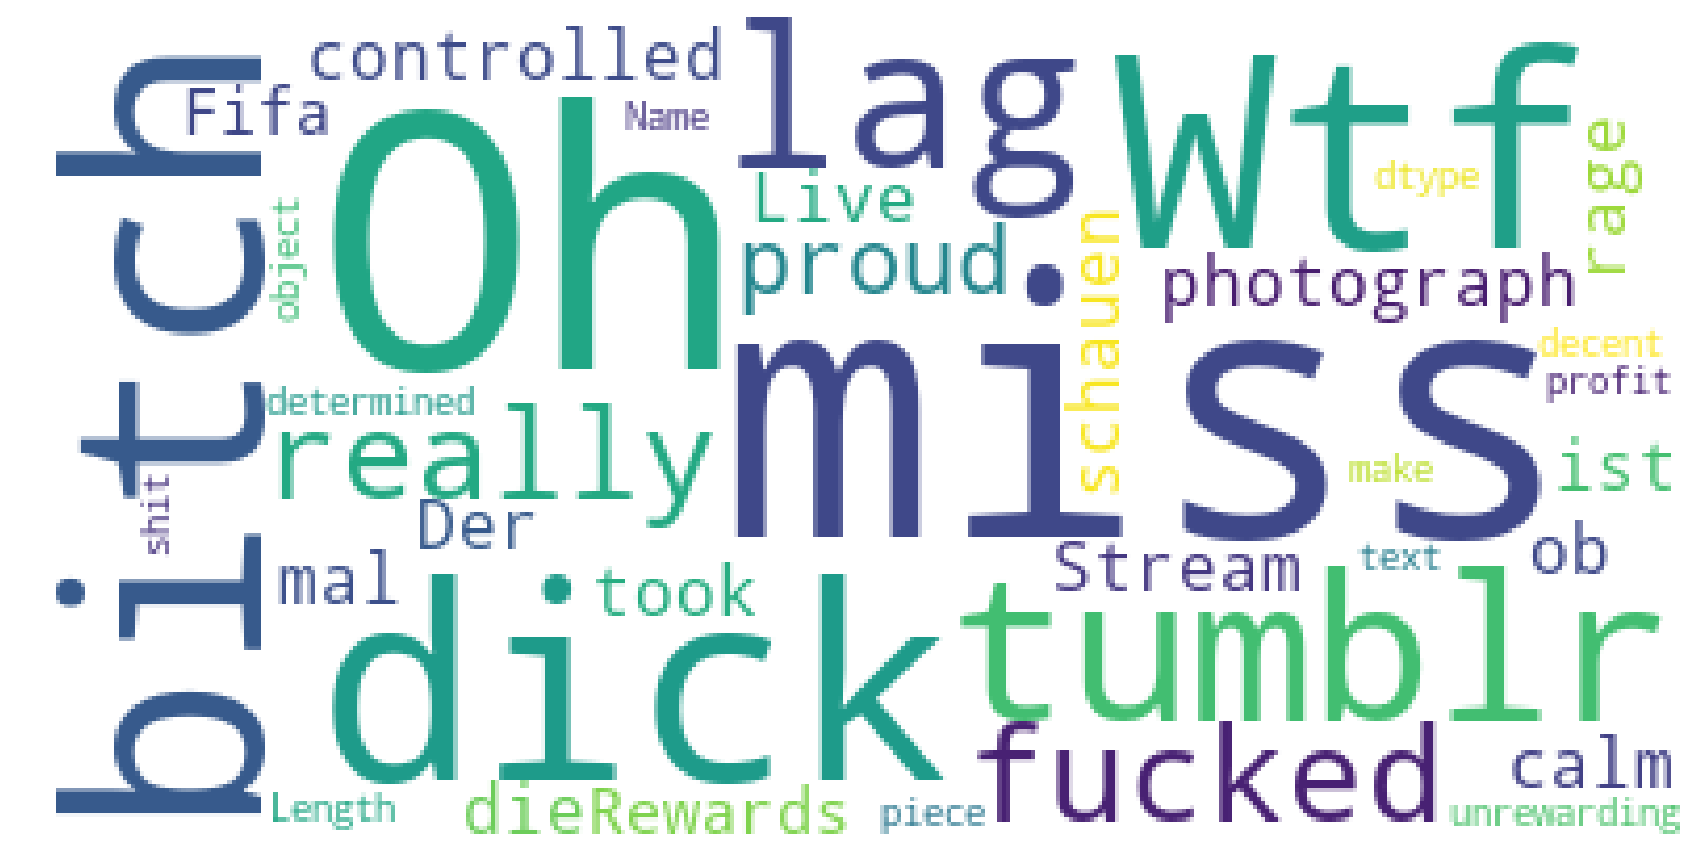

In [55]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          #max_words=300,
                          #max_font_size=40, 
                          random_state=42 
                          #mask = Tweet_mask,
                         ).generate(str(data.sort_values('neg', ascending=False).head(1500)['text']))

print(wordcloud)
fig = plt.figure(1, figsize=(15,30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

# LDA


### Text preprocessing

NLTK can be used to help us clean the text. 

In [56]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=False, reduce_len=True)
data = df
data['text'] = data['text'].apply(lambda x: tknzr.tokenize(str(x)))
data['text'] = data['text'].apply(lambda x: (' '.join(x)))

In [57]:
#text cleaning and pre-processing

data['text'] = data['text'].apply(lambda x: re.sub('RT.*?:', '', x)) #RT means retweet 
data['text'] = data['text'].apply(lambda x: re.sub(r"http\S+", '', x)) #no need for URLs
data['text'] = data['text'].apply(lambda x: re.sub("\n", '', x)) 
data['text'] = data['text'].apply(lambda x: re.sub(r"(?i)Vodafone", '', x)) #if we don't drop Vodafone it will take over the corpus
data['text'] = data['text'].apply(lambda x: re.sub(r"@\S+", '', x))
data['text'] = data['text'].apply(lambda x: re.sub(r"#", '', x)) 
data['text'] = data['text'].apply(lambda x: re.sub(r"@", '', x)) 

Now that we have a bunch of clean Tweets, let's  turn all tweets into a text corpus

(A corpus is defined as all text documents combined)

In [58]:
docs=data['text'].unique().tolist()
docs[:10]

['Another piece of top class officiating , well done on a cracking game boys ',
 'How ’ s Laporte in FIFA20 ?',
 'Jack I no get the FIFA20 yet ooo 😓 ',
 'Bundesliga SBC 172k on the PS4 181k on Xbox The Average Discard return from the packs is 86,775 Coins but you wil … ',
 'Simple FUT trading method guides here — >  FIFA20 UltimateScream FUT20',
 ' Unkind ACL roster S26 GFX :  UpTheUnkind Fifa20 ProClubs ',
 "Fifa20 Twitter thanks for the support I just reached my goal of 900 subscribers now on to 1K who's got me lets gr … ",
 '',
 'I really love the content released by ',
 ' Do you ever feel like LFC is OP im FIFA 20 CM ? Or is it just me . I beat anyone 3 or 4 - 0 easy . But against LFC … ']

### Stemming

Stemming words is a common NLP technique to reduce topically similar words to their root. For example, “stemming,” “stemmer,” “stemmed,” all have similar meanings; stemming reduces those terms to “stem.” This is important for topic modeling, which would otherwise view those terms as separate entities and reduce their importance in the model.

The Porter stemming algorithm is the most widely used method. To implement a Porter stemming algorithm, import the Porter Stemmer module.

In [ ]:
from stem  import stem
docs = [[stem(word) for word in sentence.split(" ")] for sentence in docs]



In [60]:
docs[0]

'Another piece of top class officiating , well done on a cracking game boys '

In [ ]:
#using tweet preprocessor to further clean our tweets for topic coherence analysis
import preprocessor as p
docs = [p.clean(doc) for doc in docs]

## Topic coherenece

How do we know what's the best number of topics for our corpus? 

When determining how many topics to use, it’s important to consider both qualitative and quantitative factors. Qualitatively, you should have domain knowledge of the data you’re analyzing and be able to gauge a general ballpark of clusters your data will separate into. There should be enough topics to be able to distinguish between overarching themes in the text but not so many topics that they lose their interpretability.

A quantitative solution we can use to evaluate a topic model that has better human interpretability is called topic coherence. Topic coherence looks at a set of words in generated topics and rates the interpretability of the topics.

For further information regarding topic coherence and how it is calculated, feel free to refer to the following [paper](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf).

In [62]:
import operator
from collections import namedtuple

from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
texts = [sentence.split(" ") for sentence in docs]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [64]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list

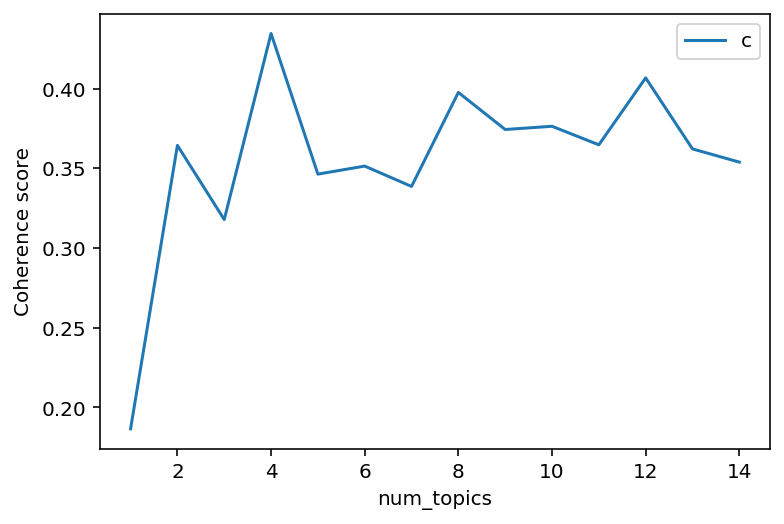

In [65]:
lm_list = evaluate_graph(dictionary, corpus, texts, 15)

Based on the graph above, we see that 5 topics receives has the highest coherence score, followed by 13.

**Now that we have our dataset, let's move on to pre-processing and modeling**

## Topic modeling With Sci-kit learn

We can remove stop words from our text corpus. Stop words are certain parts of English speech, like conjunctions (“for”, “or”) or the word “the” are meaningless to a topic model.

In [66]:
NUM_TOPICS = 5

vectorizer = CountVectorizer(min_df=0.01, max_df=0.95, stop_words='english', lowercase=True)
data_vectorized = vectorizer.fit_transform(docs)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
print("There are",lda_Z.shape[0],"documents and", lda_Z.shape[1], "topics")

# Let's see how the first document in the corpus looks like in different topic spaces
print(lda_Z[0])

There are 18551 documents and 5 topics
[0.10000004 0.10000003 0.10000004 0.10000002 0.59999987]


In [67]:
def print_topics(model, vectorizer, top_n=5):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx), [(vectorizer.get_feature_names()[i], int(topic[i]))
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model Topics:")
print_topics(lda_model, vectorizer)

LDA Model Topics:
Topic 0: [('en', 2235), ('el', 1777), ('la', 1673), ('que', 1519), ('se', 602)]
Topic 1: [('le', 958), ('est', 834), ('je', 820), ('sur', 793), ('es', 700)]
Topic 2: [('fifa20', 6512), ('fut', 681), ('fut20', 672), ('live', 462), ('sbc', 446)]
Topic 3: [('fifa', 9631), ('20', 8883), ('team', 638), ('ultimate', 277), ('video', 200)]
Topic 4: [('die', 597), ('que', 542), ('um', 489), ('ps4', 476), ('der', 474)]
